## Gradient Booster

In [1]:

import pandas as pd
import numpy as np

In [2]:
# Reading CSV files
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [3]:
# converting the target column to int type
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [4]:
df.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'SCORE',
       'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB', 'DPDB',
       'DPDB_VAL'],
      dtype='object')

In [5]:
#Adding independent and dependent columns from dataframe to train model
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [6]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [7]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# Training GradientBoost model

from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [9]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [10]:
#checking the Accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = gradient_booster.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.759


In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#checking the confusion matrix, precision, recall and f1 score
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[929  84   0   0]
 [225  81   0   0]
 [  0   0 265  49]
 [  0   0  70  70]]
Accuracy score: 0.7586012408347433
Precision Score :  0.6688037894199841
Recall Score :  0.6314332282796482
F1 score:  0.639634281024266


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [12]:
#checking the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1013
           1       0.49      0.26      0.34       306
           2       0.79      0.84      0.82       314
           3       0.59      0.50      0.54       140

    accuracy                           0.76      1773
   macro avg       0.67      0.63      0.64      1773
weighted avg       0.73      0.76      0.74      1773



Text(69.0, 0.5, 'Truth')

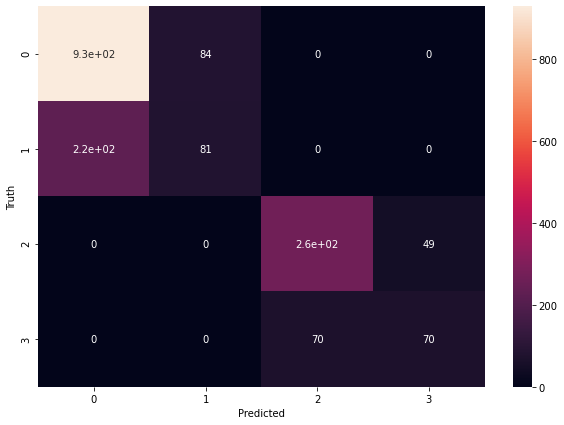

In [13]:
#plotting confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(gradient_booster, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

## Ada Boost

In [15]:
import pandas as pd
import numpy as np

In [16]:
# Reading CSV files
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [17]:
#Adding independent and dependent columns from dataframe to train model
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [18]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [19]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [20]:
# training adaboost classifier model
from sklearn.ensemble import AdaBoostClassifier


In [21]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)

In [22]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [23]:
#checking the Accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = gradient_booster.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.759


In [24]:
#checking the confusion matrix, precision, recall and f1 score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[929  84   0   0]
 [225  81   0   0]
 [  0   0 265  49]
 [  0   0  70  70]]
Accuracy score: 0.7586012408347433
Precision Score :  0.6688037894199841
Recall Score :  0.6314332282796482
F1 score:  0.639634281024266


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(69.0, 0.5, 'Truth')

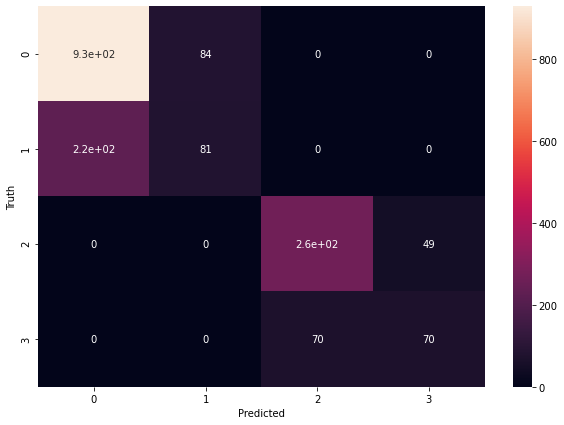

In [25]:
# Plotting confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(gradient_booster, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

## XGBOOST

In [27]:
import pandas as pd
import numpy as np

In [28]:
#installing XGboost
!pip install xgboost

In [29]:
#reading CSV files
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [30]:
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [31]:
df.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'SCORE',
       'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB', 'DPDB',
       'DPDB_VAL'],
      dtype='object')

In [32]:
#Adding independent and dependent columns from dataframe to train model

X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [33]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [34]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [35]:
# TRAINING Xg boost classifier model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [36]:
# checking accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.818


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#checking the confusion matrix, precision, recall and f1 score
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[914  99   0   0]
 [126 180   0   0]
 [  0   0 269  45]
 [  0   0  53  87]]
Accuracy score: 0.8178228990411731
Precision Score :  0.7546255199919295
Recall Score :  0.7421555618367844
F1 score:  0.7478516834583057


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [38]:
#checking classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1013
           1       0.65      0.59      0.62       306
           2       0.84      0.86      0.85       314
           3       0.66      0.62      0.64       140

    accuracy                           0.82      1773
   macro avg       0.75      0.74      0.75      1773
weighted avg       0.81      0.82      0.82      1773



Text(69.0, 0.5, 'Truth')

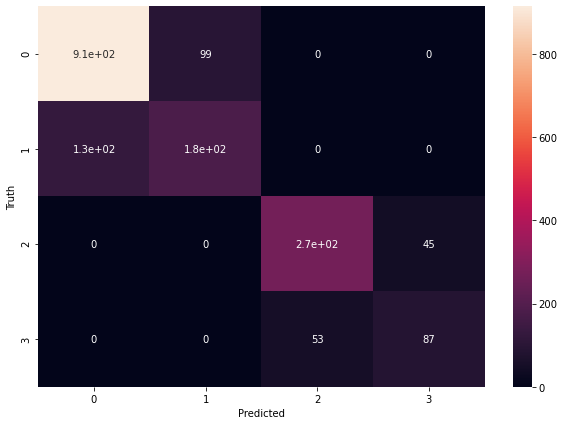

In [39]:
#plotting confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

## For prediction of Depresion using XGBoost

In [41]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [42]:
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [43]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DEPRESSION'

y = df[dependentVar].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

In [45]:
from xgboost import XGBRegressor
model = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
model.fit(X_train, y_train)

[13:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [47]:
import sklearn.metrics as metrics

In [48]:
from sklearn.metrics import max_error, r2_score, mean_squared_error, mean_absolute_error
max_error = metrics.max_error(y_test, y_pred)
print("Maximum Residual Error: ", max_error)
r2score =   r2_score(y_test, y_pred)
print("R2 Regression Score: ", r2score)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Regression Loss: ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error Regression Loss: ", mse)


Maximum Residual Error:  0.014180958271026611
R2 Regression Score:  0.9989484806724465
Mean Squared Error Regression Loss:  0.00020030898803273493
Mean Absolute Error Regression Loss:  0.00020030898803273493


In [49]:
from scipy.stats import itemfreq
itemfreq(y_test)


<ipython-input-49-819e16e8029e>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.000e+00, 1.319e+03],
       [1.000e+00, 4.540e+02]])

In [50]:
from scipy.stats import itemfreq
itemfreq(y_pred)

<ipython-input-50-9562988d3aea>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_pred)


array([[1.41434390e-02, 1.31900000e+03],
       [9.85819042e-01, 4.54000000e+02]])

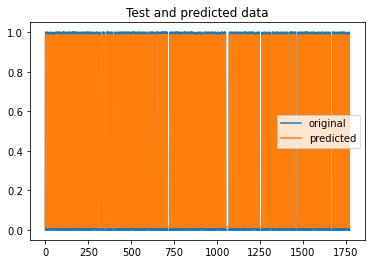

In [51]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

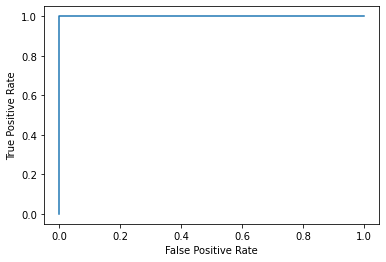

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

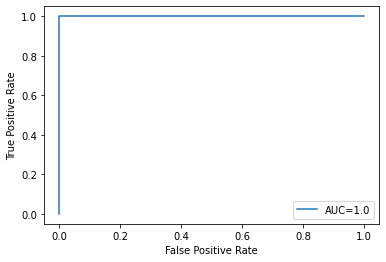

In [53]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## For prediction of Diabetes using XGBoost

In [54]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [55]:
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [56]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DEPRESSION', 'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DIABETES'

y = df[dependentVar].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [58]:
from xgboost import XGBRegressor
model = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
model.fit(X_train, y_train)

[13:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [59]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [60]:
import sklearn.metrics as metrics

In [61]:
from sklearn.metrics import max_error, r2_score, mean_squared_error, mean_absolute_error
max_error = metrics.max_error(y_test, y_pred)
print("Maximum Residual Error: ", max_error)
r2score =   r2_score(y_test, y_pred)
print("R2 Regression Score: ", r2score)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Regression Loss: ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error Regression Loss: ", mse)


Maximum Residual Error:  0.9977018348872662
R2 Regression Score:  0.22044757172353857
Mean Squared Error Regression Loss:  0.1467687647405185
Mean Absolute Error Regression Loss:  0.1467687647405185


In [62]:
from scipy.stats import itemfreq
itemfreq(y_test)

<ipython-input-62-819e16e8029e>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.000e+00, 1.327e+03],
       [1.000e+00, 4.460e+02]])

In [63]:
from scipy.stats import itemfreq
itemfreq(y_pred)

<ipython-input-63-9562988d3aea>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_pred)


array([[-0.19362186,  1.        ],
       [-0.13395703,  1.        ],
       [-0.08793565,  1.        ],
       ...,
       [ 0.92630702,  1.        ],
       [ 0.93158597,  1.        ],
       [ 0.94064635,  2.        ]])

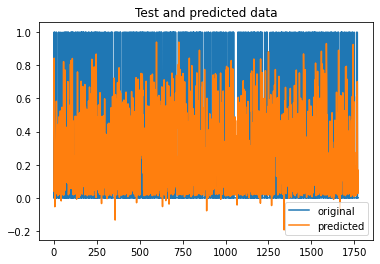

In [64]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

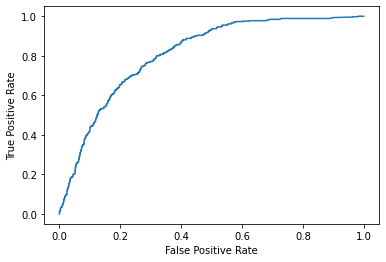

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

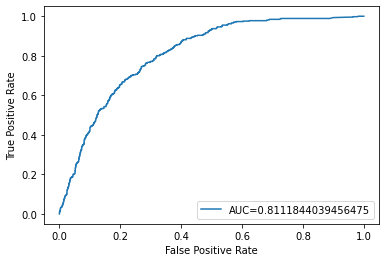

In [66]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()